Neste exemplo vamos brincar com ações, dado um conjunto de ações eu quero fazer uma previsão para os proximos meses 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Criando dados fictícios para o preço de uma ação

In [16]:
preco_acao = [12, 12, 15, 18, 20, 22, 15, 28, 30, 20, 40, 45, 30, 55, 60]

Criando um DataFrame

In [17]:
datas = pd.date_range(
    start='2022-01-01',
    periods=len(preco_acao),
    freq='ME'
)
print(datas)

precos = pd.Series(preco_acao, index=datas)
print(precos)


DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', freq='ME')
2022-01-31    12
2022-02-28    12
2022-03-31    15
2022-04-30    18
2022-05-31    20
2022-06-30    22
2022-07-31    15
2022-08-31    28
2022-09-30    30
2022-10-31    20
2022-11-30    40
2022-12-31    45
2023-01-31    30
2023-02-28    55
2023-03-31    60
Freq: ME, dtype: int64


Plotando a Serie Temporal

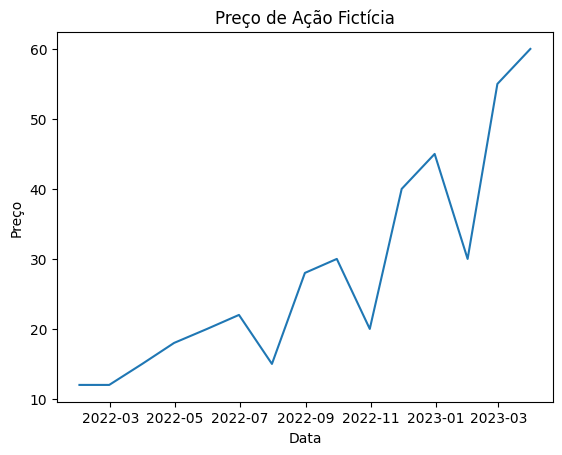

In [18]:
plt.plot(precos)
plt.title('Preço de Ação Fictícia')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

Agora vamos treinar o modelo <b>ARIMA</b> com os dados

In [19]:
modelo = ARIMA(precos, order=(1, 1, 1))
resultado = modelo.fit()

c:\Users\muril\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fazendo previsões para os proxmios 6 meses

In [20]:
qtd_meses = 6
proximas_datas = pd.date_range(
    start='2022-07-01',
    periods=qtd_meses,
    freq='ME'
)
print(proximas_datas)

proximas_previsoes = resultado.forecast(steps=qtd_meses)

print(proximas_previsoes)


DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='ME')
2023-04-30    56.174409
2023-05-31    59.066927
2023-06-30    56.879903
2023-07-31    58.533505
2023-08-31    57.283222
2023-09-30    58.228557
Freq: ME, Name: predicted_mean, dtype: float64


Agora que temos as previsões, vamos plotar ela no gráfico para visualização

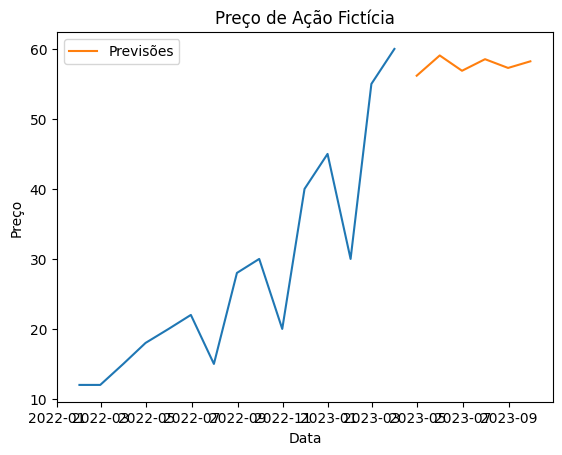

In [21]:
plt.plot(precos)
plt.plot(proximas_previsoes, label='Previsões')
plt.title('Preço de Ação Fictícia')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()